# Exercise 1 - Data storytelling

## 0. Tell a story from immigration

In [4]:
import pandas as pd 
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]

df_nordic = df_nordic.fillna("0")

for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

In [5]:
df_nordic = duckdb.query("""--sql
        WITH nordic AS (
        FROM df 
            SELECT 
                state, 
                SUM("Total foreign born") as "Total foreigners", 
                SUM("Sweden") as Swedes, 
                SUM("Norway") as Norwegians, 
                SUM("Denmark") as Danish, 
                SUM("Finland") as Finnish, 
            GROUP BY
                state
        )
        FROM nordic n
        SELECT 
            *,
            n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
        ORDER BY 
            nordic
        DESC
             
""").df()

df_nordic.head(10)

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0
5,California,160828.0,7223.0,2729.0,3082.0,986.0,14020.0
6,Washington,40868.0,5150.0,3686.0,1193.0,603.0,10632.0
7,Pennsylvania,514506.0,5986.0,861.0,1210.0,378.0,8435.0
8,Nebraska,34456.0,4864.0,457.0,2888.0,11.0,8220.0
9,Connecticut,101502.0,6647.0,273.0,1144.0,41.0,8105.0


In [6]:
top_3_nordic = (
    df_nordic.drop(["Nordic", "Total foreigners"], axis=1).set_index("State").head(3)
)
top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

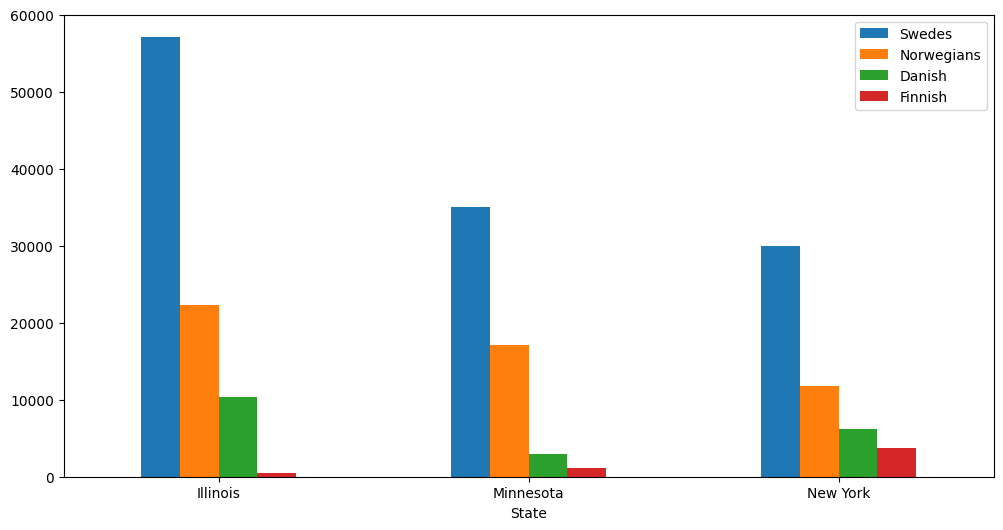

In [7]:
import matplotlib.pyplot as plt


def nordic_plot():

    ax = top_3_nordic.plot(kind="bar", figsize=(12, 6))
    ax.set_xticklabels(top_3_nordic.index, rotation=0)

    fig = ax.get_figure()
    return fig, ax


nordic_plot()

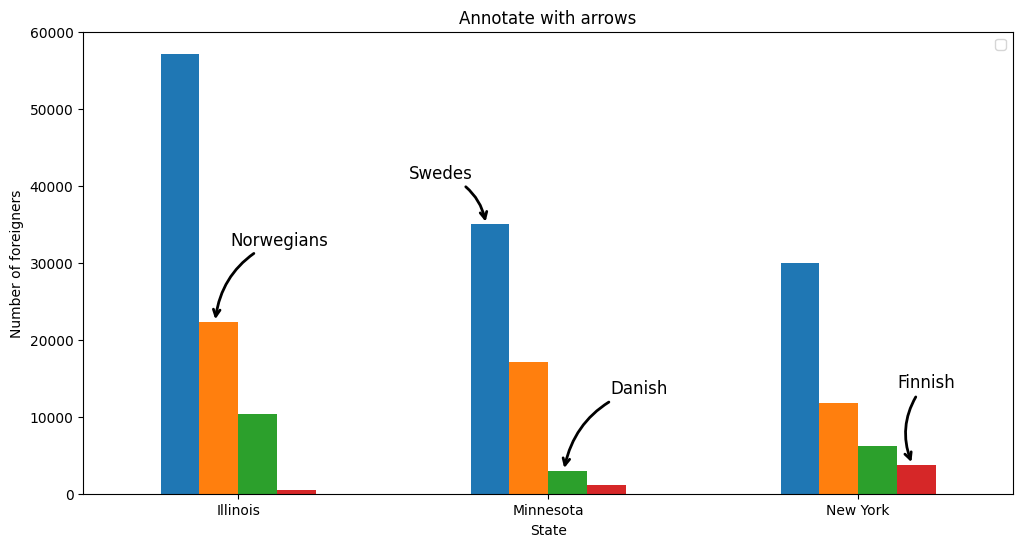

In [8]:
fix, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers
# which contains 3 artists each

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle="->", connectionstyle=f"arc3, rad={rad}", linewidth=2)

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
    )


annotate_nordic(swede_bars[1], "Swedes", x_offset=-0.2, y_offset=6000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=10000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0, y_offset=10000)
annotate_nordic(danish_bars[1], "Danish", x_offset=0.2, y_offset=10000)

ax.set(title = "Annotate with arrows", ylabel="Number of foreigners")
ax.legend("")

###  a) Remove clutter from this visualization such as:
- top spine and right spine. 
- change the unit to thousands with a prefix K.

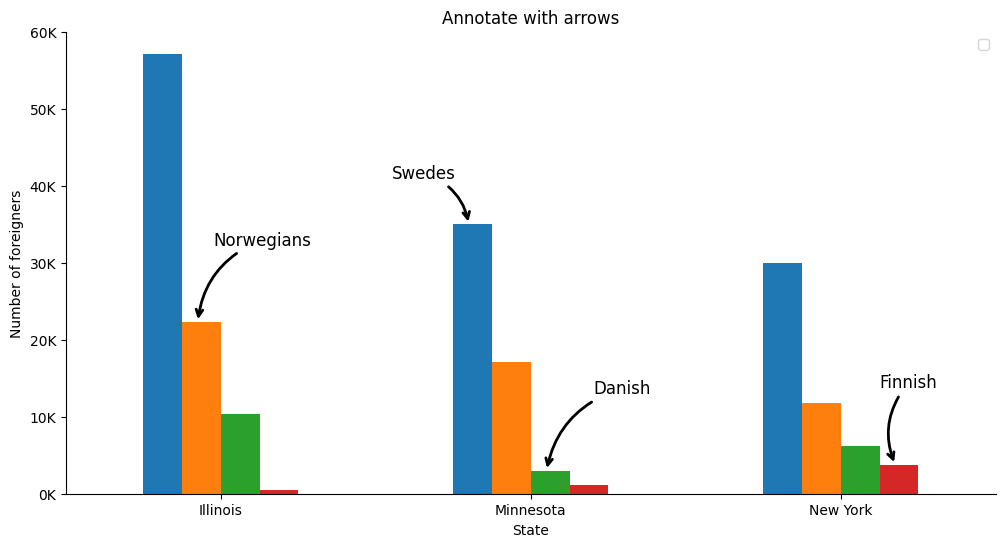

In [13]:
from constants import GRAY_1, GRAY_2,GRAY_3,BLUE_1

fix, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers
# which contains 3 artists each

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle="->", connectionstyle=f"arc3, rad={rad}", linewidth=2)

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
    )


annotate_nordic(swede_bars[1], "Swedes", x_offset=-0.2, y_offset=6000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=10000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0, y_offset=10000)
annotate_nordic(danish_bars[1], "Danish", x_offset=0.2, y_offset=10000)

ax.set(title = "Annotate with arrows", ylabel="Number of foreigners")
ax.legend("")

# remove clutter: top spine and right spine. 
ax.spines[['top', 'right']].set_visible(False)

# change the unit to thousands with a prefix K.
from matplotlib.ticker import FuncFormatter
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

###  b) Left align the xlabel, top align the ylabel and left align the title
###  d) Choose a story to tell and change the labels and title accordingly

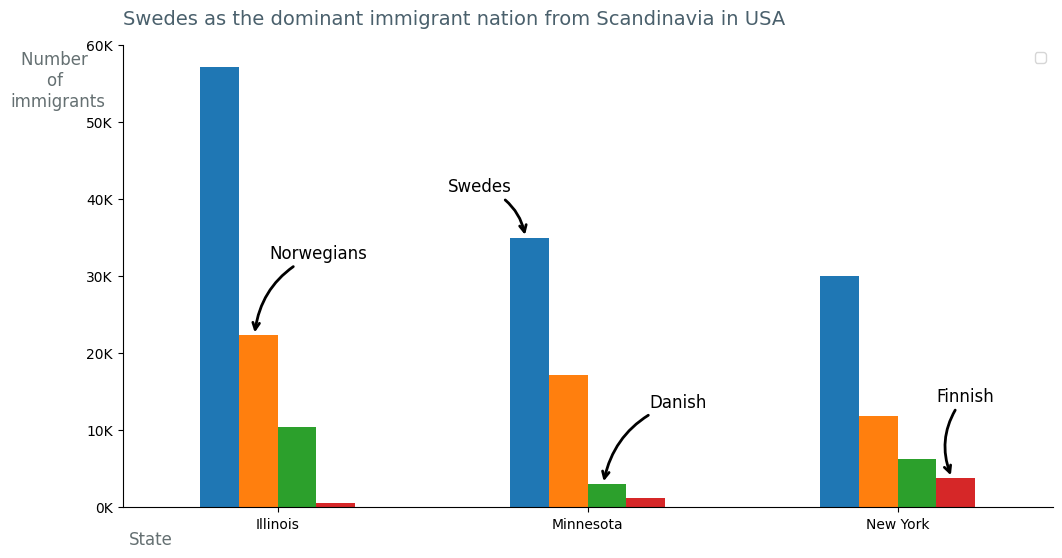

In [51]:
from constants import GRAY_1, GRAY_2,GRAY_3,BLUE_1

fix, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers
# which contains 3 artists each

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle="->", connectionstyle=f"arc3, rad={rad}", linewidth=2)

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
    )


annotate_nordic(swede_bars[1], "Swedes", x_offset=-0.2, y_offset=6000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=10000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0, y_offset=10000)
annotate_nordic(danish_bars[1], "Danish", x_offset=0.2, y_offset=10000)

#  left align the title
ax.set_title( 
    "Swedes as the dominant immigrant nation from Scandinavia in USA", 
    loc="left",
    fontsize=14,
    color = GRAY_3, 
    pad=15
)

# Left align the xlabel
ax.set_xlabel("State", color=GRAY_2, fontsize=12) # possible add on:  fontweight= "bold"
ax.xaxis.set_label_coords(0.03, -0.05)

# top align the ylabel
ax.set_ylabel("Number \nof \nimmigrants", color=GRAY_2, fontsize=12, rotation=0)
ax.yaxis.set_label_coords(-0.07, 0.86)

ax.legend("")

# remove clutter: top spine and right spine. 
ax.spines[['top', 'right']].set_visible(False)

# change the unit to thousands with a prefix K.
from matplotlib.ticker import FuncFormatter
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

###   c) Use contrast to focus the attention to what you want the audience to see

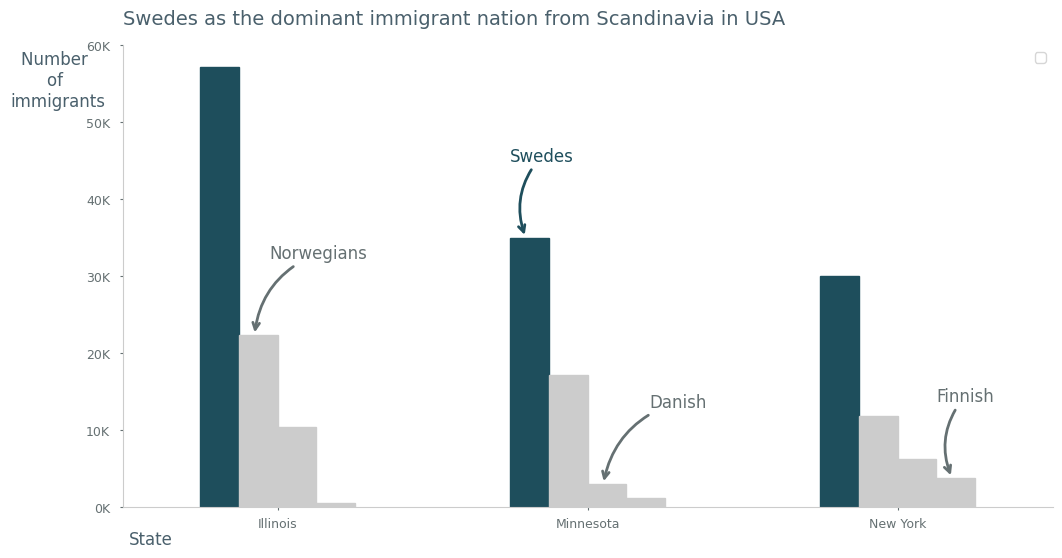

In [63]:
from constants import GRAY_1, GRAY_2,GRAY_3,BLUE_1

fix, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers
# which contains 3 artists each

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    rad = -0.3 if x_offset < 0 else 0.3

    # Color logic
    is_swede = text.lower() == "swedes"
    color = BLUE_1 if is_swede else GRAY_2

    arrowprops = dict(
        arrowstyle="->", 
        connectionstyle=f"arc3, rad={rad}", 
        linewidth=2,
        color=color
    )

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
        color=color
    )


annotate_nordic(swede_bars[1], "Swedes", x_offset=0.0, y_offset=10000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=10000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0, y_offset=10000)
annotate_nordic(danish_bars[1], "Danish", x_offset=0.2, y_offset=10000)

#  left align the title
ax.set_title( 
    "Swedes as the dominant immigrant nation from Scandinavia in USA", 
    loc="left",
    fontsize=14,
    color = GRAY_3, 
    pad=15
)

# Left align the xlabel
ax.set_xlabel("State", color=GRAY_3, fontsize=12) # possible add on:  fontweight= "bold"
ax.xaxis.set_label_coords(0.03, -0.05)

# top align the ylabel
ax.set_ylabel("Number \nof \nimmigrants", color=GRAY_3, fontsize=12, rotation=0)
ax.yaxis.set_label_coords(-0.07, 0.86)

ax.legend("")

# remove clutter: top spine and right spine. 
ax.spines[['top', 'right']].set_visible(False)

# contrast
ax.spines[['bottom', 'left']].set_color(GRAY_1)
ax.tick_params(
    axis="both", 
    colors = GRAY_2, 
    labelsize = 9, 
    length = 2,
    pad = 5
    )
ax.tick_params(axis= "y", pad = 7)

# change the unit to thousands with a prefix K.
from matplotlib.ticker import FuncFormatter
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)


for bar in swede_bars:
    bar.set_color(BLUE_1)

for bar in norwegian_bars + danish_bars + finnish_bars:
    bar.set_color(GRAY_1)